# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [2]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

In [11]:
#Import IRIS dataset using scikit learn
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_df['target'] = iris.target
iris_df['Flower type'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Display the DataFrame
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   Flower type        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [12]:
iris_df['target'].unique()

array([0, 1, 2])

# Importing data

In [13]:
# Define the col names for the iris dataset
iris_df.columns

# Dataset url


# Load the dataset from HHDD


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'Flower type'],
      dtype='object')

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [14]:
iris_df.shape

(150, 6)

2. Drop rows with any missing values


In [18]:
iris_df.dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower type
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


3. Encoding the class label categorical column: from string to num


In [19]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
iris_df.drop(columns=["target"], inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

iris_df['Encoded'] = label_encoder.fit_transform(iris_df['Flower type'])

#Visualize the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower type,Encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


Now the label/category is numeric


In [20]:
iris_df['Encoded'].unique()

array([0, 1, 2])

4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

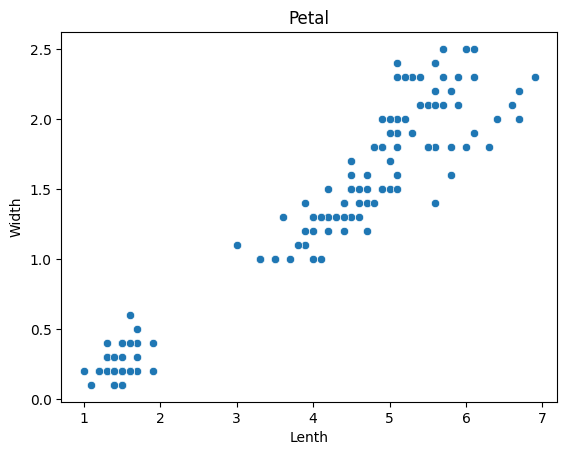

In [21]:
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)')
plt.xlabel('Lenth')
plt.ylabel('Width')
plt.title('Petal')
plt.show()

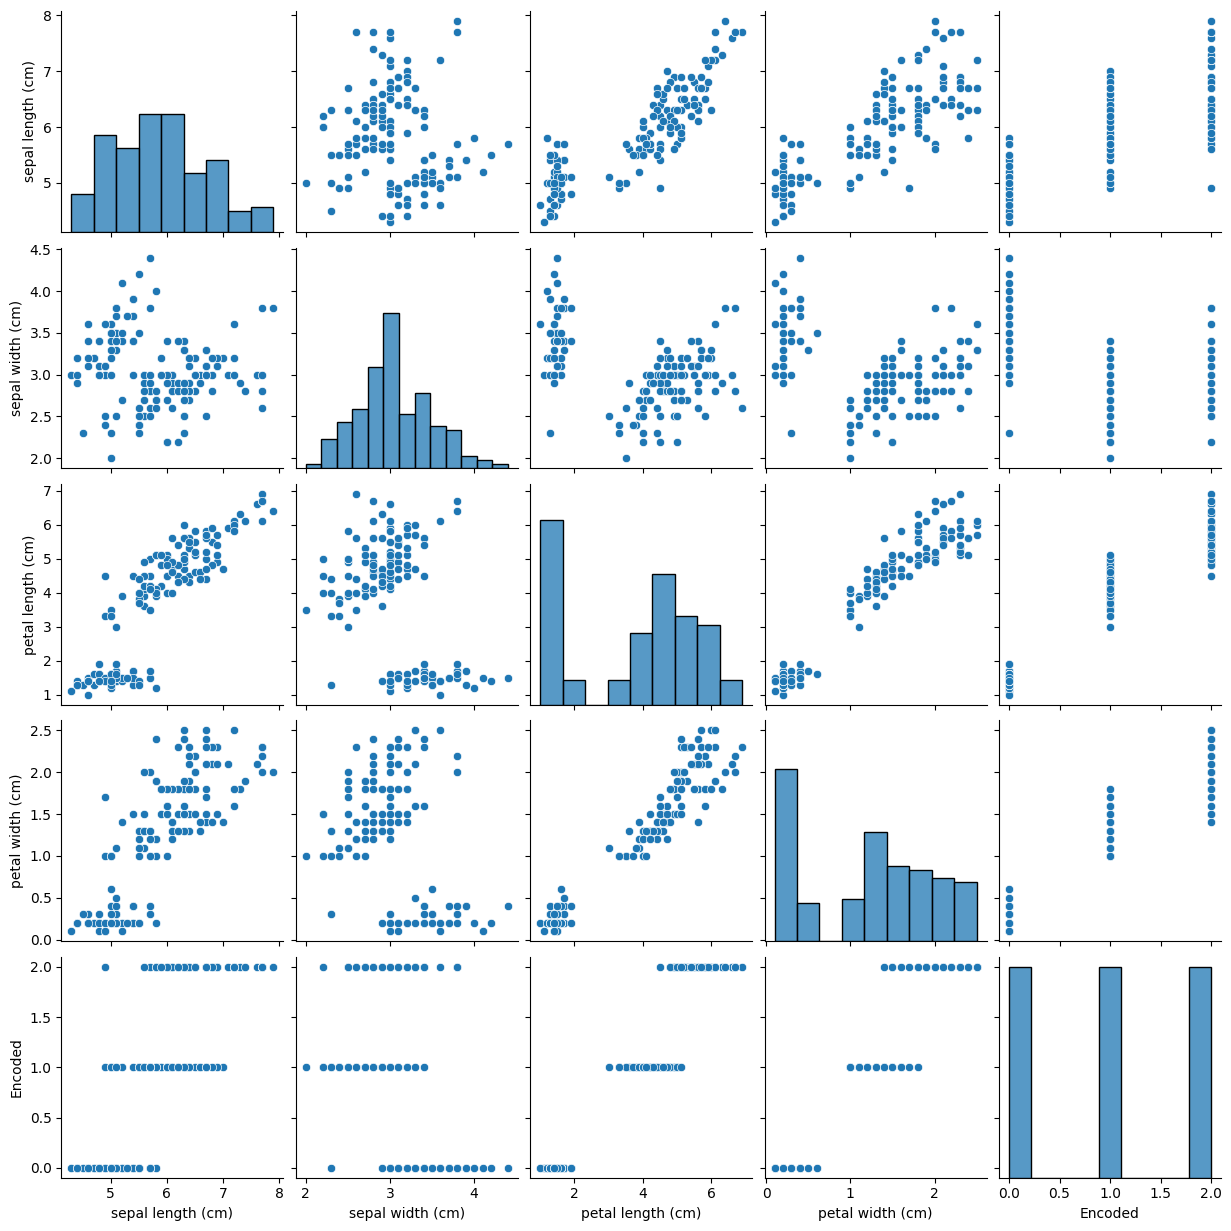

In [22]:
# Pairplot: Scatterplot of all variables
sns.pairplot(data=iris_df)
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

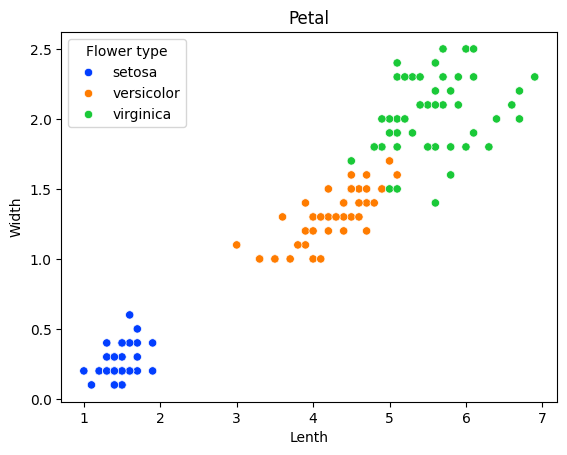

In [27]:
# Get dataframes for each real cluster
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='Flower type', palette='bright')
plt.xlabel('Lenth')
plt.ylabel('Width')
plt.title('Petal')
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [30]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Do K-means clustering (assing each point in the dataset to a cluster)
iris_df.drop(columns=['Flower type'], inplace=True)
kmeans.fit(iris_df)

# Print estimated cluster of each point in the dataset
array = kmeans.labels_
print(array)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

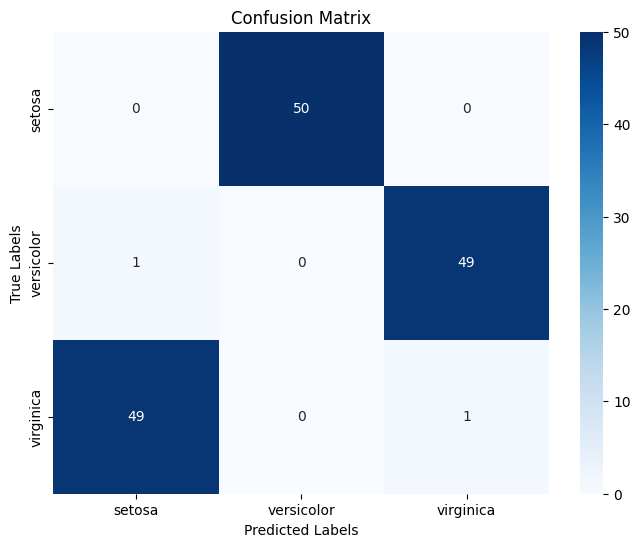

In [33]:
# Manual pairing the labels of the real and estimated clusters

#Get confusion Matrix
from sklearn.metrics import confusion_matrix
true_labels = iris_df['Encoded']
conf_matrix = confusion_matrix(true_labels, array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

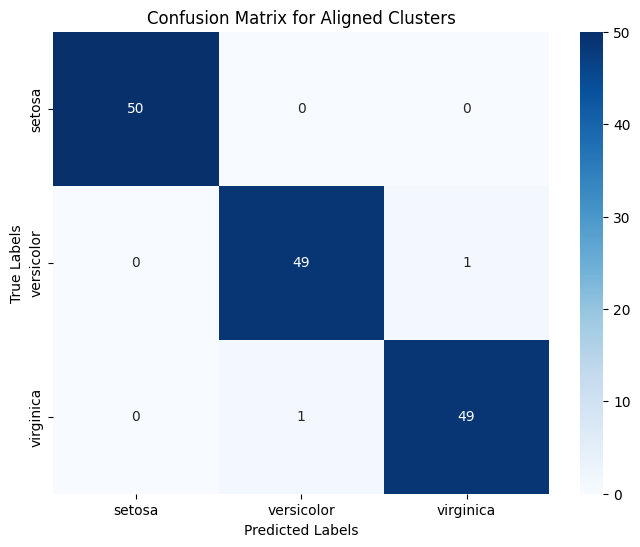

In [34]:

from scipy.optimize import linear_sum_assignment

# Use the Hungarian algorithm to find the best label mapping
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

# Map predicted clusters to the true labels
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
aligned_clusters = [label_mapping[cluster] for cluster in array]

# Compute the confusion matrix after aligning the clusters
aligned_conf_matrix = confusion_matrix(true_labels, aligned_clusters)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(aligned_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Aligned Clusters')
plt.show()

In [35]:
# Add a new column to the dataset with the cluster information
iris_df['Cluster'] = aligned_clusters

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Encoded,Cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [36]:
# Label of the estimated clusters
iris_df['Cluster'].unique()

array([0, 1, 2])

In [38]:
# Cluster centroides
centroids = kmeans.cluster_centers_

centroids

array([[6.624, 2.984, 5.562, 2.026, 1.98 ],
       [5.006, 3.428, 1.462, 0.246, 0.   ],
       [5.9  , 2.76 , 4.25 , 1.326, 1.02 ]])

In [39]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_

# Display the SSE
print(f"Sum of Squared Errors (SSE): {sse}")

Sum of Squared Errors (SSE): 87.2646


In [40]:
# The number of iterations required to converge
iterations = kmeans.n_iter_

# Display the number of iterations
print(f"Number of iterations to converge: {iterations}")

Number of iterations to converge: 7


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

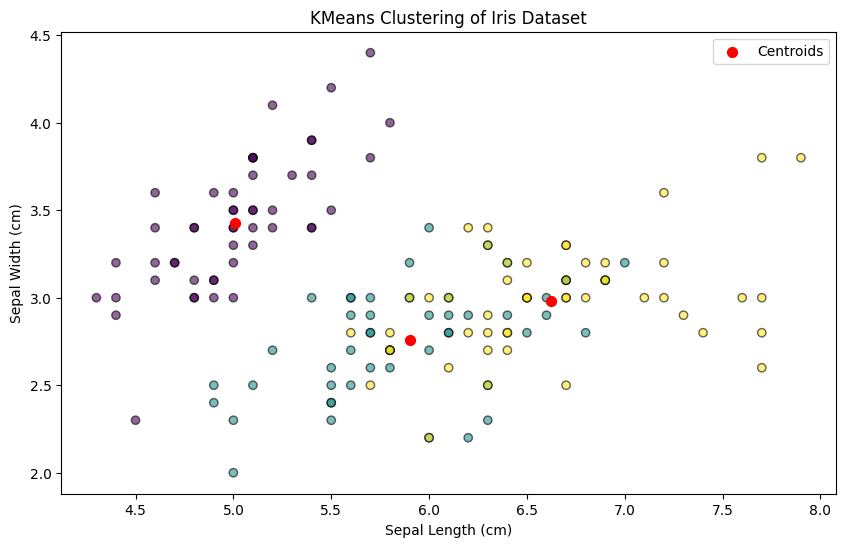

In [46]:
# Plotting only the first two features for visualization
plt.figure(figsize=(10, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

# Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='.', s=200, label='Centroids')

# Adding labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

/var/folders/rl/yxgy1z953vn7bjw8pr2587pr0000gn/T/ipykernel_8868/381571835.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


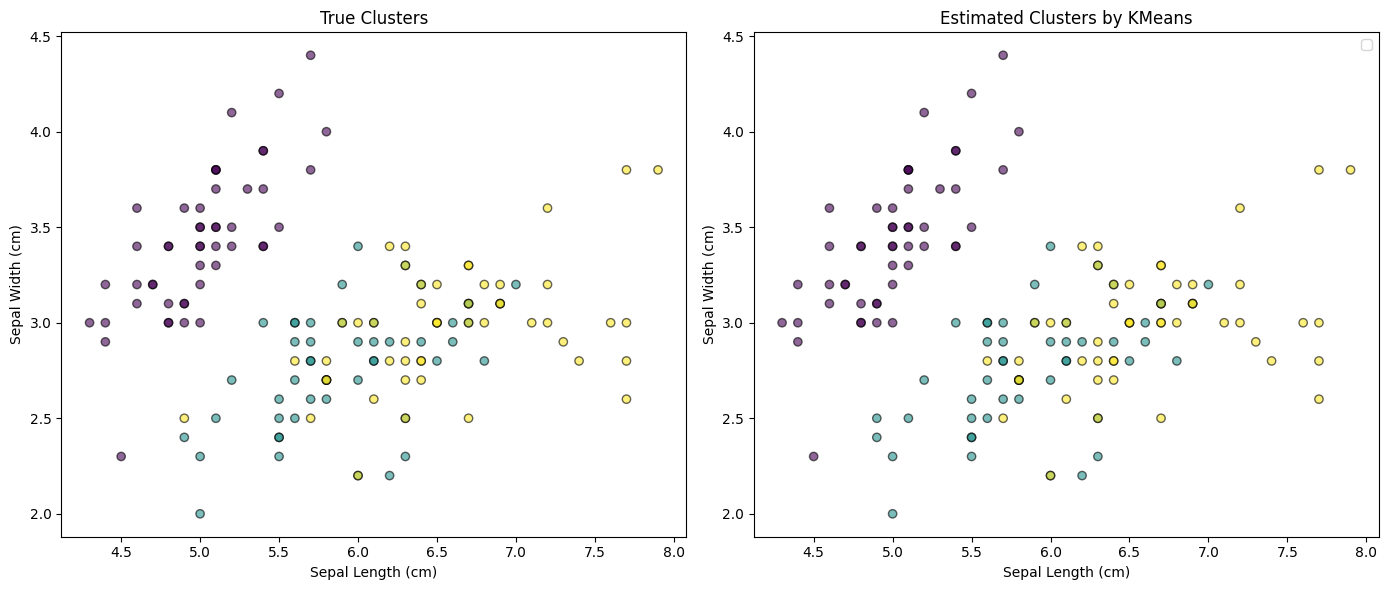

In [50]:
# Plotting the true labels
plt.figure(figsize=(14, 6))

# Plot 1: True Labels
plt.subplot(1, 2, 1)
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Encoded'], cmap='viridis', alpha=0.6, edgecolor='k')
plt.title('True Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Plot 2: Estimated Clusters
plt.subplot(1, 2, 2)
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')
plt.title('Estimated Clusters by KMeans')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot



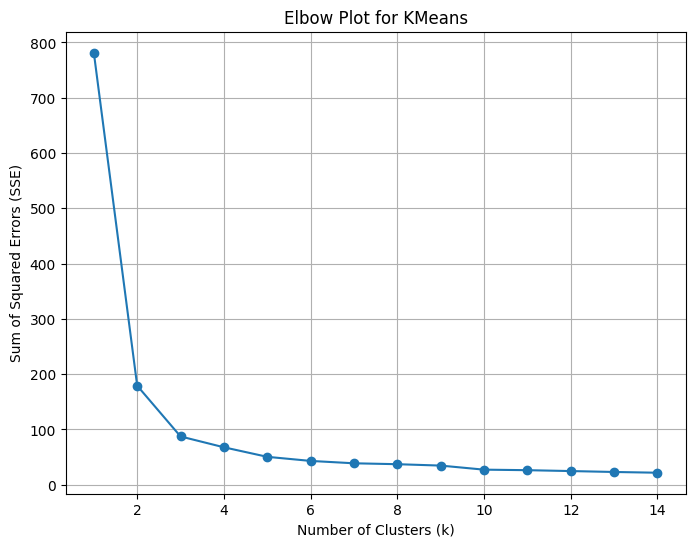

In [56]:
# Range of k values to try
k_values = range(1, 15)

# List to store SSE for each k
sse = []

X = iris_df.drop(columns=['Cluster'])

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot for KMeans')
plt.grid(True)
plt.show()


Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k